<h1 style="text-align: center;">MSc Data Science</h1>


<h2 style="text-align: center;">MDS572C: REINFORCEMENT LEARNING</h2>


<h3 style="text-align: center;">CAT2 - Practical Component</h3>


<div style="text-align: right; font-family: Arial, sans-serif;">
<strong>Sanjay R</strong><br>
2348055<br>
5MDS
</div>

Q1

## **Introduction:**

## **Objectives:**


## **Concepts used:**

## **Program Description:**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

Streaming output truncated to the last 5000 lines.
Final opponent hand: [2, 6, 6, 5], sum: 19
State value function after episode 13: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

--- Episode 14 ---
Initial agent hand: [6, 2], sum: 8
Initial opponent hand: [1, 1], sum: 2
Agent draws 7. New hand: [6, 2, 7], sum: 15
Agent draws 9. New hand: [6, 2, 7, 9], sum: 24
Opponent draws 8. New hand: [1, 1, 8], sum: 10
Opponent draws 10. New hand: [1, 1, 8, 10], sum: 20
Final agent hand: [6, 2, 7, 9], sum: 24
Final opponent hand: [1, 1, 8, 10], sum: 20
State value function after episode 14: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

--- Episode 15 ---
Initial agent hand: [7, 10], sum: 17
Initial opponent hand: [5, 3], sum: 8
Opponent draws 10. New hand: [5, 3, 10], sum: 18
Final agent hand: [7, 10], sum: 17
Final opponent hand: [5, 3, 10], sum: 18
State value function after episode 15: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

--- Ep

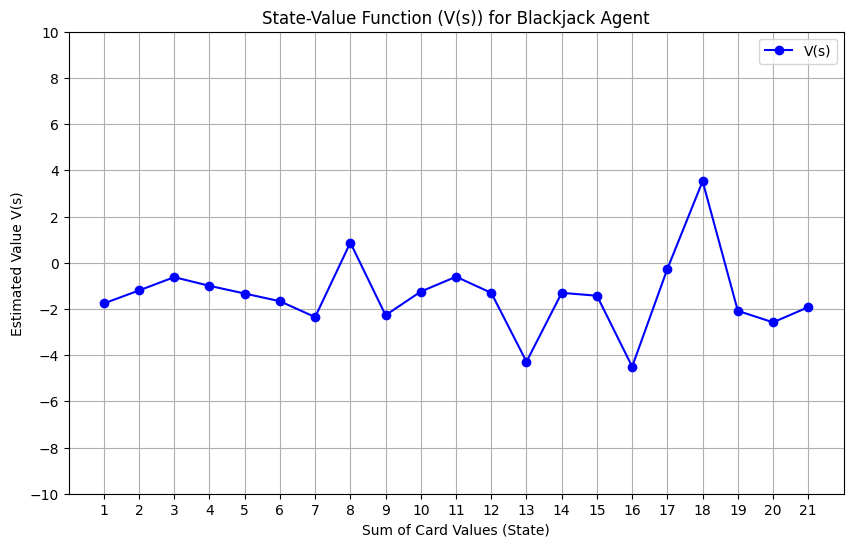

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the card game environment
class Blackjack:
    def __init__(self):
        self.card_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        self.reward_win = 10
        self.reward_lose = -10
        self.reward_draw = 0

    def draw_card(self):
        """Simulate drawing a card with value between 1 and 10."""
        return random.choice(self.card_values)

    def is_bust(self, score):
        """Check if the player has gone over 21."""
        return score > 21

    def play_game(self, agent_action_policy):
        """Simulate one game of Blackjack for the agent with a given policy."""
        agent_cards = [self.draw_card(), self.draw_card()]
        opponent_cards = [self.draw_card(), self.draw_card()]

        print(f"Initial agent hand: {agent_cards}, sum: {sum(agent_cards)}")
        print(f"Initial opponent hand: {opponent_cards}, sum: {sum(opponent_cards)}")

        # Play agent's turn
        while not self.is_bust(sum(agent_cards)) and agent_action_policy(sum(agent_cards)):
            drawn_card = self.draw_card()
            agent_cards.append(drawn_card)
            print(f"Agent draws {drawn_card}. New hand: {agent_cards}, sum: {sum(agent_cards)}")

        # Play opponent's turn
        while sum(opponent_cards) < 17:  # Opponent stops at 17 or more
            drawn_card = self.draw_card()
            opponent_cards.append(drawn_card)
            print(f"Opponent draws {drawn_card}. New hand: {opponent_cards}, sum: {sum(opponent_cards)}")

        agent_score = sum(agent_cards)
        opponent_score = sum(opponent_cards)

        print(f"Final agent hand: {agent_cards}, sum: {agent_score}")
        print(f"Final opponent hand: {opponent_cards}, sum: {opponent_score}")

        if self.is_bust(agent_score):
            return self.reward_lose
        elif self.is_bust(opponent_score):
            return self.reward_win
        elif agent_score > opponent_score:
            return self.reward_win
        elif agent_score < opponent_score:
            return self.reward_lose
        else:
            return self.reward_draw

# Monte Carlo Agent for Blackjack
class MonteCarloAgent:
    def __init__(self, epsilon=0.5, num_episodes=500):
        self.epsilon = epsilon  # Exploration-exploitation trade-off
        self.num_episodes = num_episodes
        self.value_function = np.zeros(21)  # State values for sum of cards (1-21)
        self.returns = {i: [] for i in range(1, 22)}  # Store returns for each state

    def agent_policy(self, state):
        """The policy is to hit (draw) if the sum is less than 17, otherwise stick."""
        return state < 17  # Hit if sum is less than 17

    def monte_carlo_prediction(self, environment):
        """Monte Carlo prediction to estimate the state-value function."""
        for episode in range(self.num_episodes):
            state = random.randint(1, 21)  # Random initial state of the agent (card sum)
            print(f"\n--- Episode {episode + 1} ---")
            reward = environment.play_game(self.agent_policy)  # Get the reward for the game
            self.returns[state].append(reward)

            # Print the state value updates after each episode
            print(f"State value function after episode {episode + 1}: {self.value_function}")

        # Update the value function V(s) for each state (sum of cards)
        for state in range(1, 22):
            if self.returns[state]:
                self.value_function[state - 1] = np.mean(self.returns[state])

    def plot_value_function(self):
        """Plot the state-value function V(s) for all possible states."""
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, 22), self.value_function, marker='o', color='b', label="V(s)")
        plt.title("State-Value Function (V(s)) for Blackjack Agent")
        plt.xlabel("Sum of Card Values (State)")
        plt.ylabel("Estimated Value V(s)")
        plt.grid(True)
        plt.xticks(range(1, 22))
        plt.yticks(np.arange(-10, 11, 2))
        plt.legend()
        plt.show()

# Main Simulation
if __name__ == "__main__":
    # Create Blackjack environment and Monte Carlo agent
    env = Blackjack()
    agent = MonteCarloAgent(epsilon=0.5, num_episodes=500)

    # Run Monte Carlo prediction
    agent.monte_carlo_prediction(env)

    # Plot the value function
    agent.plot_value_function()



--- Initial State Values (V(s)) ---
V(1) = 0.0
V(2) = 0.0
V(3) = 0.0
V(4) = 0.0
V(5) = 0.0
V(6) = 0.0
V(7) = 0.0
V(8) = 0.0
V(9) = 0.0
V(10) = 0.0
V(11) = 0.0
V(12) = 0.0
V(13) = 0.0
V(14) = 0.0
V(15) = 0.0
V(16) = 0.0
V(17) = 0.0
V(18) = 0.0
V(19) = 0.0
V(20) = 0.0
V(21) = 0.0
Initial hand: [1, 3], Sum: 4
Chosen action: Hit
New hand: [1, 3, 1], New sum: 5
Chosen action: Hit
New hand: [1, 3, 1, 6], New sum: 11
Chosen action: Hit
New hand: [1, 3, 1, 6, 5], New sum: 16
Chosen action: Hit
New hand: [1, 3, 1, 6, 5, 6], New sum: 22
Initial hand: [2, 3], Sum: 5
Chosen action: Hit
New hand: [2, 3, 1], New sum: 6
Chosen action: Hit
New hand: [2, 3, 1, 9], New sum: 15
Chosen action: Hit
New hand: [2, 3, 1, 9, 9], New sum: 24
Initial hand: [9, 2], Sum: 11
Chosen action: Hit
New hand: [9, 2, 10], New sum: 21
Chosen action: Stick
Opponent's hand: [9, 4], Sum: 13
Opponent's new hand: [9, 4, 4], New sum: 17
Initial hand: [1, 1], Sum: 2
Chosen action: Hit
New hand: [1, 1, 8], New sum: 10
Chosen acti

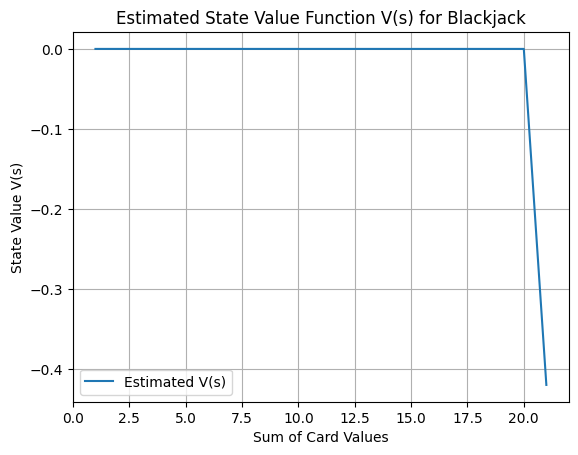


--- Final State Values (V(s)) after Monte Carlo ---
V(1) = 0.0
V(2) = 0.0
V(3) = 0.0
V(4) = 0.0
V(5) = 0.0
V(6) = 0.0
V(7) = 0.0
V(8) = 0.0
V(9) = 0.0
V(10) = 0.0
V(11) = 0.0
V(12) = 0.0
V(13) = 0.0
V(14) = 0.0
V(15) = 0.0
V(16) = 0.0
V(17) = 0.0
V(18) = 0.0
V(19) = 0.0
V(20) = 0.0
V(21) = -0.42


In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define constants for the game
NUM_EPISODES = 500  # Number of episodes to simulate
ACTION_HIT = 1      # Action: Hit (draw a card)
ACTION_STICK = 0    # Action: Stick (end the turn)
MAX_SUM = 21        # Maximum sum of card values to stay under

# Define the possible card values (from 1 to 10)
CARDS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Blackjack agent with Monte Carlo value estimation
class BlackjackAgent:
    def __init__(self):
        self.value_table = np.zeros(MAX_SUM + 1)  # Initialize V(s) for all possible states
        self.returns = np.zeros(MAX_SUM + 1)      # Store the sum of rewards for each state
        self.visits = np.zeros(MAX_SUM + 1)       # Store the count of visits to each state

    def play_game(self):
        # Initialize the game (deal 2 cards)
        hand = [random.choice(CARDS), random.choice(CARDS)]
        state = sum(hand)
        done = False

        print(f"Initial hand: {hand}, Sum: {state}")

        while not done:
            # Choose action based on policy (stick if sum >= 17, else hit)
            action = ACTION_HIT if state < 17 else ACTION_STICK
            print(f"Chosen action: {'Hit' if action == ACTION_HIT else 'Stick'}")

            if action == ACTION_HIT:
                # Draw a card and update state
                hand.append(random.choice(CARDS))
                state = sum(hand)
                print(f"New hand: {hand}, New sum: {state}")
                if state > MAX_SUM:
                    # Bust, the agent loses
                    return -10
            else:
                # Stick, end the game
                done = True

        # Check if the agent wins, loses, or draws
        opponent_hand = [random.choice(CARDS), random.choice(CARDS)]
        opponent_state = sum(opponent_hand)
        print(f"Opponent's hand: {opponent_hand}, Sum: {opponent_state}")

        while opponent_state < 17:
            # The opponent will keep drawing cards if their sum is less than 17
            opponent_hand.append(random.choice(CARDS))
            opponent_state = sum(opponent_hand)
            print(f"Opponent's new hand: {opponent_hand}, New sum: {opponent_state}")

        if opponent_state > MAX_SUM:
            # Opponent busts
            return 10
        elif opponent_state > state:
            # Opponent has a higher sum, agent loses
            return -10
        elif opponent_state == state:
            # It's a draw
            return 0
        else:
            # Agent wins
            return 10

    def update_value_table(self):
        # Run Monte Carlo simulations for NUM_EPISODES episodes
        for _ in range(NUM_EPISODES):
            total_reward = 0
            game_result = self.play_game()
            total_reward += game_result
            self.returns[state] += total_reward
            self.visits[state] += 1
            self.value_table[state] = self.returns[state] / self.visits[state]  # Update V(s)

# Initialize the Blackjack Agent
agent = BlackjackAgent()

# Output the initial V(s) for all states
print("\n--- Initial State Values (V(s)) ---")
for state in range(1, MAX_SUM + 1):
    print(f"V({state}) = {agent.value_table[state]}")

# Run the Monte Carlo Prediction method
agent.update_value_table()

# Plotting the state-value function V(s)
states = np.arange(1, MAX_SUM + 1)
plt.plot(states, agent.value_table[1:], label='Estimated V(s)')
plt.xlabel("Sum of Card Values")
plt.ylabel("State Value V(s)")
plt.title("Estimated State Value Function V(s) for Blackjack")
plt.grid(True)
plt.legend()
plt.show()

# Output the final V(s) for each state and the progression of states/actions
print("\n--- Final State Values (V(s)) after Monte Carlo ---")
for state in range(1, MAX_SUM + 1):
    print(f"V({state}) = {agent.value_table[state]}")


Initial hand: [8, 9], Sum: 17
Chosen action: Stick
Opponent's hand: [6, 1], Sum: 7
Opponent's new hand: [6, 1, 6], New sum: 13
Opponent's new hand: [6, 1, 6, 2], New sum: 15
Opponent's new hand: [6, 1, 6, 2, 4], New sum: 19
Initial hand: [4, 2], Sum: 6
Chosen action: Hit
New hand: [4, 2, 6], New sum: 12
Chosen action: Hit
New hand: [4, 2, 6, 4], New sum: 16
Chosen action: Hit
New hand: [4, 2, 6, 4, 9], New sum: 25
Initial hand: [7, 8], Sum: 15
Chosen action: Hit
New hand: [7, 8, 9], New sum: 24
Initial hand: [9, 9], Sum: 18
Chosen action: Stick
Opponent's hand: [4, 4], Sum: 8
Opponent's new hand: [4, 4, 9], New sum: 17
Initial hand: [5, 5], Sum: 10
Chosen action: Hit
New hand: [5, 5, 7], New sum: 17
Chosen action: Stick
Opponent's hand: [5, 9], Sum: 14
Opponent's new hand: [5, 9, 4], New sum: 18
Initial hand: [6, 7], Sum: 13
Chosen action: Hit
New hand: [6, 7, 7], New sum: 20
Chosen action: Stick
Opponent's hand: [9, 8], Sum: 17
Initial hand: [5, 7], Sum: 12
Chosen action: Hit
New hand

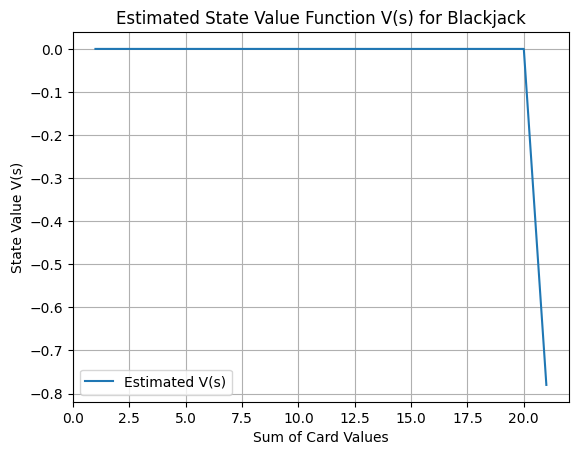


--- State and Value Information ---
V(1) = 0.0
V(2) = 0.0
V(3) = 0.0
V(4) = 0.0
V(5) = 0.0
V(6) = 0.0
V(7) = 0.0
V(8) = 0.0
V(9) = 0.0
V(10) = 0.0
V(11) = 0.0
V(12) = 0.0
V(13) = 0.0
V(14) = 0.0
V(15) = 0.0
V(16) = 0.0
V(17) = 0.0
V(18) = 0.0
V(19) = 0.0
V(20) = 0.0
V(21) = -0.78


In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define constants for the game
NUM_EPISODES = 500  # Number of episodes to simulate
ACTION_HIT = 1      # Action: Hit (draw a card)
ACTION_STICK = 0    # Action: Stick (end the turn)
MAX_SUM = 21        # Maximum sum of card values to stay under

# Define the possible card values (from 1 to 10)
CARDS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Blackjack agent with Monte Carlo value estimation
class BlackjackAgent:
    def __init__(self):
        self.value_table = np.zeros(MAX_SUM + 1)  # Initialize V(s) for all possible states
        self.returns = np.zeros(MAX_SUM + 1)      # Store the sum of rewards for each state
        self.visits = np.zeros(MAX_SUM + 1)       # Store the count of visits to each state

    def play_game(self):
        # Initialize the game (deal 2 cards)
        hand = [random.choice(CARDS), random.choice(CARDS)]
        state = sum(hand)
        done = False

        print(f"Initial hand: {hand}, Sum: {state}")

        while not done:
            # Choose action based on policy (stick if sum >= 17, else hit)
            action = ACTION_HIT if state < 17 else ACTION_STICK
            print(f"Chosen action: {'Hit' if action == ACTION_HIT else 'Stick'}")

            if action == ACTION_HIT:
                # Draw a card and update state
                hand.append(random.choice(CARDS))
                state = sum(hand)
                print(f"New hand: {hand}, New sum: {state}")
                if state > MAX_SUM:
                    # Bust, the agent loses
                    return -10
            else:
                # Stick, end the game
                done = True

        # Check if the agent wins, loses, or draws
        opponent_hand = [random.choice(CARDS), random.choice(CARDS)]
        opponent_state = sum(opponent_hand)
        print(f"Opponent's hand: {opponent_hand}, Sum: {opponent_state}")

        while opponent_state < 17:
            # The opponent will keep drawing cards if their sum is less than 17
            opponent_hand.append(random.choice(CARDS))
            opponent_state = sum(opponent_hand)
            print(f"Opponent's new hand: {opponent_hand}, New sum: {opponent_state}")

        if opponent_state > MAX_SUM:
            # Opponent busts
            return 10
        elif opponent_state > state:
            # Opponent has a higher sum, agent loses
            return -10
        elif opponent_state == state:
            # It's a draw
            return 0
        else:
            # Agent wins
            return 10

    def update_value_table(self):
        # Run Monte Carlo simulations for NUM_EPISODES episodes
        for _ in range(NUM_EPISODES):
            total_reward = 0
            game_result = self.play_game()
            total_reward += game_result
            self.returns[state] += total_reward
            self.visits[state] += 1
            self.value_table[state] = self.returns[state] / self.visits[state]  # Update V(s)

# Initialize the Blackjack Agent
agent = BlackjackAgent()

# Run the Monte Carlo Prediction method
agent.update_value_table()

# Plotting the state-value function V(s)
states = np.arange(1, MAX_SUM + 1)
plt.plot(states, agent.value_table[1:], label='Estimated V(s)')
plt.xlabel("Sum of Card Values")
plt.ylabel("State Value V(s)")
plt.title("Estimated State Value Function V(s) for Blackjack")
plt.grid(True)
plt.legend()
plt.show()

# Output the value of V(s) for each state and the progression of states/actions
print("\n--- State and Value Information ---")
for state in range(1, MAX_SUM + 1):
    print(f"V({state}) = {agent.value_table[state]}")


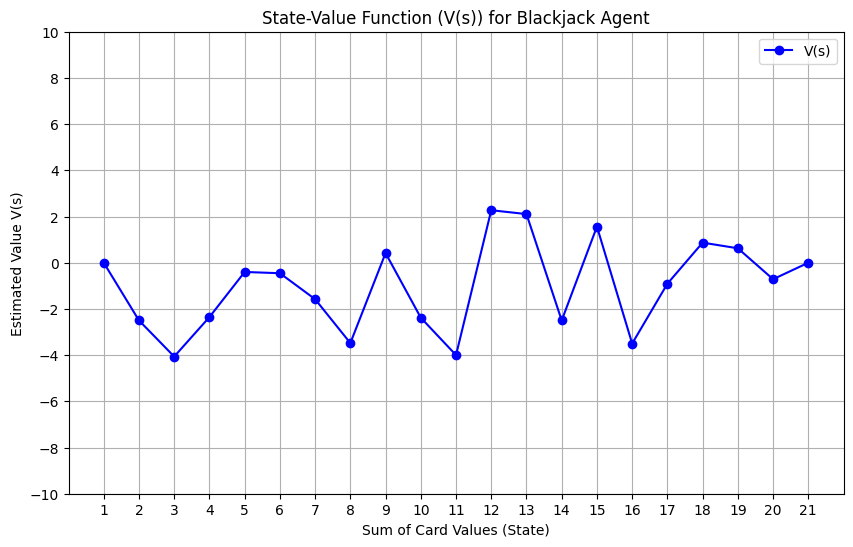

Estimated State-Value Function V(s) and Actions:
Sum of Cards = 1: V(s) = 0.00, Actions = [['Hit'], ['Hit', 'Stick'], ['Hit', 'Hit', 'Stick']]
Sum of Cards = 2: V(s) = -2.50, Actions = [['Hit', 'Hit', 'Stick'], ['Hit', 'Hit', 'Stick'], ['Hit', 'Hit']]
Sum of Cards = 3: V(s) = -4.06, Actions = [['Hit', 'Stick'], ['Hit', 'Stick'], ['Hit', 'Hit']]
Sum of Cards = 4: V(s) = -2.35, Actions = [['Stick'], ['Hit', 'Hit', 'Hit'], ['Hit']]
Sum of Cards = 5: V(s) = -0.40, Actions = [['Hit', 'Hit', 'Stick'], ['Hit', 'Stick'], ['Hit', 'Stick']]
Sum of Cards = 6: V(s) = -0.45, Actions = [['Hit', 'Hit', 'Stick'], ['Stick'], ['Hit', 'Hit', 'Stick']]
Sum of Cards = 7: V(s) = -1.58, Actions = [['Hit', 'Stick'], ['Hit', 'Stick'], ['Hit', 'Hit', 'Stick']]
Sum of Cards = 8: V(s) = -3.48, Actions = [['Hit', 'Stick'], ['Stick'], ['Hit', 'Hit', 'Hit', 'Stick']]
Sum of Cards = 9: V(s) = 0.42, Actions = [['Hit', 'Hit', 'Stick'], ['Hit', 'Hit', 'Stick'], ['Stick']]
Sum of Cards = 10: V(s) = -2.38, Actions = [['Hi

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the card game environment
class Blackjack:
    def __init__(self):
        self.card_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Possible card values
        self.reward_win = 10  # Reward for winning
        self.reward_lose = -10  # Reward for losing
        self.reward_draw = 0  # Reward for draw (tie)

    def draw_card(self):
        """Simulate drawing a card with value between 1 and 10."""
        return random.choice(self.card_values)

    def is_bust(self, score):
        """Check if the player has gone over 21."""
        return score > 21

    def play_game(self, agent_action_policy):
        """Simulate one game of Blackjack for the agent with a given policy."""
        agent_cards = [self.draw_card(), self.draw_card()]
        opponent_cards = [self.draw_card(), self.draw_card()]

        agent_actions = []  # Track actions taken by the agent

        # Play agent's turn
        while not self.is_bust(sum(agent_cards)) and agent_action_policy(sum(agent_cards)):
            agent_cards.append(self.draw_card())
            agent_actions.append("Hit")

        if not self.is_bust(sum(agent_cards)):
            agent_actions.append("Stick")

        # Play opponent's turn
        while sum(opponent_cards) < 17:  # Opponent stops at 17 or more
            opponent_cards.append(self.draw_card())

        agent_score = sum(agent_cards)
        opponent_score = sum(opponent_cards)

        if self.is_bust(agent_score):
            return self.reward_lose, agent_actions
        elif self.is_bust(opponent_score):
            return self.reward_win, agent_actions
        elif agent_score > opponent_score:
            return self.reward_win, agent_actions
        elif agent_score < opponent_score:
            return self.reward_lose, agent_actions
        else:
            return self.reward_draw, agent_actions

# Monte Carlo Agent for Blackjack
class MonteCarloAgent:
    def __init__(self, epsilon=0.5, num_episodes=500):
        self.epsilon = epsilon  # Exploration-exploitation trade-off
        self.num_episodes = num_episodes
        self.value_function = np.zeros(21)  # State values for sum of cards (1-21)
        self.returns = {i: [] for i in range(1, 22)}  # Store returns for each state
        self.action_states = {i: [] for i in range(1, 22)}  # Store actions for each state

    def agent_policy(self, state):
        """The policy is to hit (draw) if the sum is less than 17, otherwise stick."""
        return state < 17  # Hit if sum is less than 17

    def monte_carlo_prediction(self, environment):
        """Monte Carlo prediction to estimate the state-value function."""
        for episode in range(self.num_episodes):
            state = random.randint(1, 21)  # Random initial state of the agent (card sum)
            reward, actions = environment.play_game(self.agent_policy)  # Get the reward and actions for the game
            self.returns[state].append(reward)
            self.action_states[state].append(actions)

        # Update the value function V(s) for each state (sum of cards)
        for state in range(1, 22):
            if self.returns[state]:
                self.value_function[state - 1] = np.mean(self.returns[state])

    def plot_value_function(self):
        """Plot the state-value function V(s) for all possible states."""
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, 22), self.value_function, marker='o', color='b', label="V(s)")
        plt.title("State-Value Function (V(s)) for Blackjack Agent")
        plt.xlabel("Sum of Card Values (State)")
        plt.ylabel("Estimated Value V(s)")
        plt.grid(True)
        plt.xticks(range(1, 22))
        plt.yticks(np.arange(-10, 11, 2))
        plt.legend()
        plt.show()

# Main Simulation
if __name__ == "__main__":
    # Create Blackjack environment and Monte Carlo agent
    env = Blackjack()
    agent = MonteCarloAgent(epsilon=0.5, num_episodes=500)

    # Run Monte Carlo prediction
    agent.monte_carlo_prediction(env)

    # Plot the value function
    agent.plot_value_function()

    # Print the estimated value function and actions for each state
    print("Estimated State-Value Function V(s) and Actions:")
    for state in range(1, 22):
        actions = agent.action_states[state]
        print(f"Sum of Cards = {state}: V(s) = {agent.value_function[state - 1]:.2f}, Actions = {actions[:3]}")  # Show first 3 action sequences


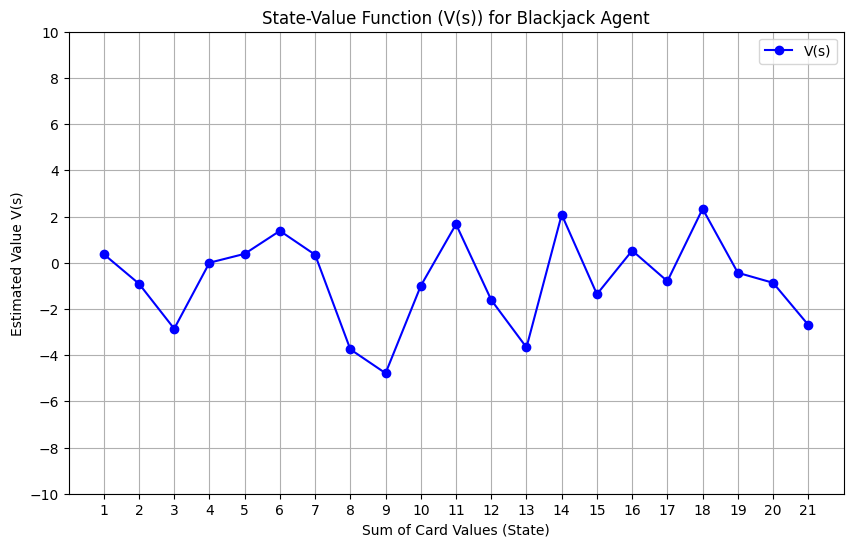

Estimated State-Value Function V(s):
Sum of Cards = 1: V(s) = 0.37
Sum of Cards = 2: V(s) = -0.91
Sum of Cards = 3: V(s) = -2.86
Sum of Cards = 4: V(s) = 0.00
Sum of Cards = 5: V(s) = 0.38
Sum of Cards = 6: V(s) = 1.38
Sum of Cards = 7: V(s) = 0.34
Sum of Cards = 8: V(s) = -3.75
Sum of Cards = 9: V(s) = -4.78
Sum of Cards = 10: V(s) = -1.00
Sum of Cards = 11: V(s) = 1.67
Sum of Cards = 12: V(s) = -1.61
Sum of Cards = 13: V(s) = -3.67
Sum of Cards = 14: V(s) = 2.08
Sum of Cards = 15: V(s) = -1.36
Sum of Cards = 16: V(s) = 0.53
Sum of Cards = 17: V(s) = -0.80
Sum of Cards = 18: V(s) = 2.33
Sum of Cards = 19: V(s) = -0.43
Sum of Cards = 20: V(s) = -0.87
Sum of Cards = 21: V(s) = -2.69


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the card game environment
class Blackjack:
    def __init__(self):
        self.card_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Possible card values
        self.reward_win = 10  # Reward for winning
        self.reward_lose = -10  # Reward for losing
        self.reward_draw = 0  # Reward for draw (tie)

    def draw_card(self):
        """Simulate drawing a card with value between 1 and 10."""
        return random.choice(self.card_values)

    def is_bust(self, score):
        """Check if the player has gone over 21."""
        return score > 21

    def play_game(self, agent_action_policy):
        """Simulate one game of Blackjack for the agent with a given policy."""
        agent_cards = [self.draw_card(), self.draw_card()]
        opponent_cards = [self.draw_card(), self.draw_card()]

        # Play agent's turn
        while not self.is_bust(sum(agent_cards)) and agent_action_policy(sum(agent_cards)):
            agent_cards.append(self.draw_card())

        # Play opponent's turn
        while sum(opponent_cards) < 17:  # Opponent stops at 17 or more
            opponent_cards.append(self.draw_card())

        agent_score = sum(agent_cards)
        opponent_score = sum(opponent_cards)

        if self.is_bust(agent_score):
            return self.reward_lose
        elif self.is_bust(opponent_score):
            return self.reward_win
        elif agent_score > opponent_score:
            return self.reward_win
        elif agent_score < opponent_score:
            return self.reward_lose
        else:
            return self.reward_draw

# Monte Carlo Agent for Blackjack
class MonteCarloAgent:
    def __init__(self, epsilon=0.5, num_episodes=500):
        self.epsilon = epsilon  # Exploration-exploitation trade-off
        self.num_episodes = num_episodes
        self.value_function = np.zeros(21)  # State values for sum of cards (1-21)
        self.returns = {i: [] for i in range(1, 22)}  # Store returns for each state

    def agent_policy(self, state):
        """The policy is to hit (draw) if the sum is less than 17, otherwise stick."""
        return state < 17  # Hit if sum is less than 17

    def monte_carlo_prediction(self, environment):
        """Monte Carlo prediction to estimate the state-value function."""
        for episode in range(self.num_episodes):
            state = random.randint(1, 21)  # Random initial state of the agent (card sum)
            reward = environment.play_game(self.agent_policy)  # Get the reward for the game
            self.returns[state].append(reward)

        # Update the value function V(s) for each state (sum of cards)
        for state in range(1, 22):
            if self.returns[state]:
                self.value_function[state - 1] = np.mean(self.returns[state])

    def plot_value_function(self):
        """Plot the state-value function V(s) for all possible states."""
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, 22), self.value_function, marker='o', color='b', label="V(s)")
        plt.title("State-Value Function (V(s)) for Blackjack Agent")
        plt.xlabel("Sum of Card Values (State)")
        plt.ylabel("Estimated Value V(s)")
        plt.grid(True)
        plt.xticks(range(1, 22))
        plt.yticks(np.arange(-10, 11, 2))
        plt.legend()
        plt.show()

# Main Simulation
if __name__ == "__main__":
    # Create Blackjack environment and Monte Carlo agent
    env = Blackjack()
    agent = MonteCarloAgent(epsilon=0.5, num_episodes=500)

    # Run Monte Carlo prediction
    agent.monte_carlo_prediction(env)

    # Plot the value function
    agent.plot_value_function()

    # Print the estimated value function for each state (sum of card values)
    print("Estimated State-Value Function V(s):")
    for state in range(1, 22):
        print(f"Sum of Cards = {state}: V(s) = {agent.value_function[state - 1]:.2f}")


## Interpretation:



## **Conclusion:**



Q2

## **Introduction:**

## **Objectives:**


## **Concepts used:**

## **Program Description:**

## **Conclusion:**



In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
price_points = [10, 15, 20]
true_probabilities = [0.5, 0.4, 0.2]  # True probabilities of purchase for each price point
n_prices = len(price_points)
T = 1000  # Number of rounds

# UCB1 Initialization
counts = np.zeros(n_prices)  # Number of times each price point is selected
rewards = np.zeros(n_prices)  # Total reward for each price point
total_revenue = []  # Track total revenue over time

def simulate_purchase(price_idx):
    """Simulate a purchase based on the true probability of the selected price."""
    return np.random.rand() < true_probabilities[price_idx]

# UCB1 Algorithm
for t in range(1, T + 1):
    if t <= n_prices:
        # Ensure each price point is tried at least once
        price_idx = t - 1
    else:
        # Calculate UCB values for each price point
        ucb_values = rewards / counts + np.sqrt(2 * np.log(t) / counts)
        price_idx = np.argmax(ucb_values)

    # Simulate purchase and update counts and rewards
    purchase = simulate_purchase(price_idx)
    counts[price_idx] += 1
    rewards[price_idx] += purchase * price_points[price_idx]

    # Update total revenue
    total_revenue.append(np.sum(rewards))

# Final Results
optimal_price_idx = np.argmax(rewards / counts)

print("Final Results:")
print("Number of Selections for Each Price Point:", counts)
print("Total Revenue:", np.sum(rewards))
print(f"Optimal Price Point: ${price_points[optimal_price_idx]}")


Final Results:
Number of Selections for Each Price Point: [987.  12.   1.]
Total Revenue: 5035.0
Optimal Price Point: $10


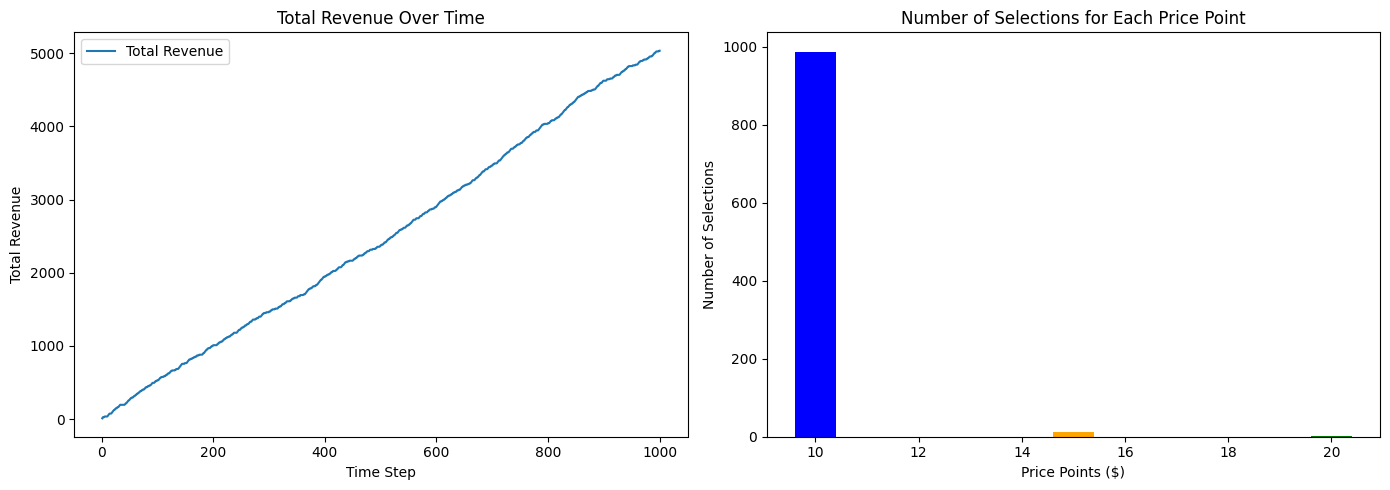

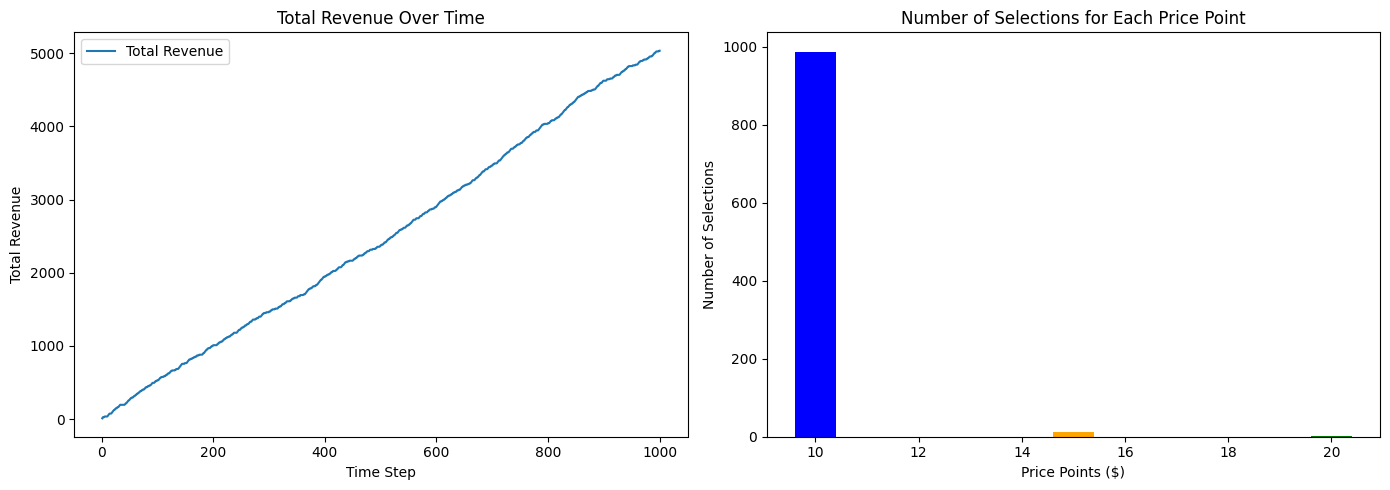

In [11]:
# Plot total revenue over time
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, T + 1), total_revenue, label="Total Revenue")
plt.xlabel("Time Step")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Over Time")
plt.legend()

# Plot number of selections for each price point
plt.subplot(1, 2, 2)
plt.bar(price_points, counts, color=['blue', 'orange', 'green'])
plt.xlabel("Price Points ($)")
plt.ylabel("Number of Selections")
plt.title("Number of Selections for Each Price Point")

plt.tight_layout()
plt.show()
# Plot total revenue over time
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, T + 1), total_revenue, label="Total Revenue")
plt.xlabel("Time Step")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Over Time")
plt.legend()

# Plot number of selections for each price point
plt.subplot(1, 2, 2)
plt.bar(price_points, counts, color=['blue', 'orange', 'green'])
plt.xlabel("Price Points ($)")
plt.ylabel("Number of Selections")
plt.title("Number of Selections for Each Price Point")

plt.tight_layout()
plt.show()


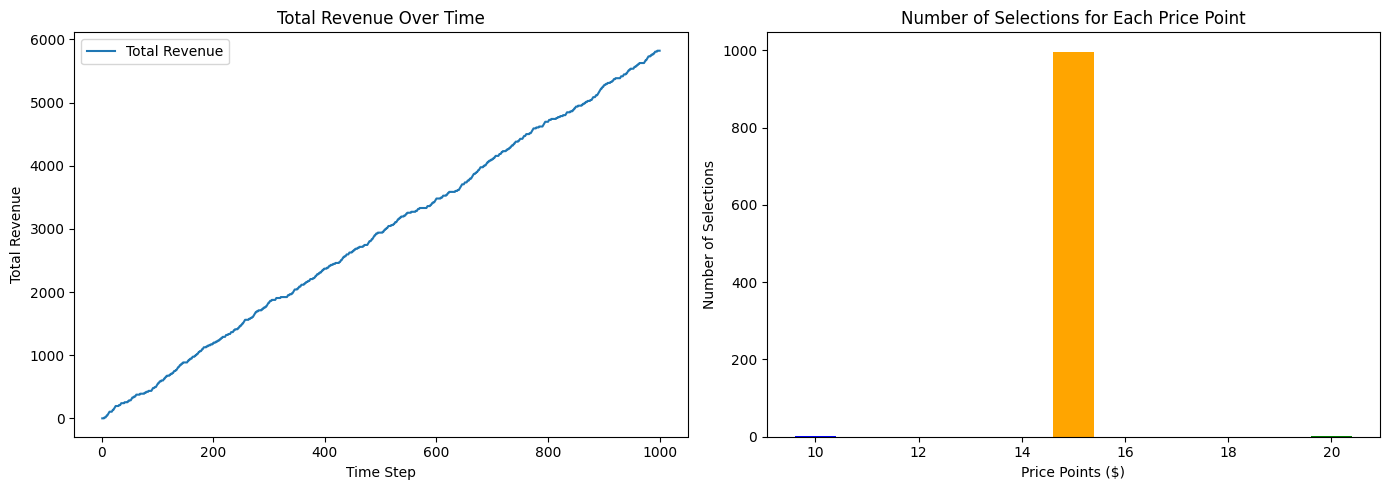

Final Results:
Number of Selections for Each Price Point: [  2. 997.   1.]
Total Revenue: $5820.00
Optimal Price Point: $15


In [12]:
import numpy as np
import matplotlib.pyplot as plt

class DynamicPricingUCB:
    def __init__(self, price_points, probabilities, rounds):
        """
        Initialize the UCB model for dynamic pricing.

        :param price_points: List of price points.
        :param probabilities: List of true purchase probabilities for each price point.
        :param rounds: Total number of rounds for simulation.
        """
        self.price_points = price_points
        self.probabilities = probabilities
        self.rounds = rounds
        self.n_prices = len(price_points)
        self.counts = np.zeros(self.n_prices)  # Number of times each price is selected
        self.rewards = np.zeros(self.n_prices)  # Total rewards for each price
        self.total_revenue = []  # Track total revenue over time

    def simulate_purchase(self, price_idx):
        """
        Simulate whether a purchase occurs for a selected price point.

        :param price_idx: Index of the selected price point.
        :return: 1 if purchase occurs, 0 otherwise.
        """
        return np.random.rand() < self.probabilities[price_idx]

    def run_simulation(self):
        """
        Run the UCB1 algorithm for the specified number of rounds.
        """
        for t in range(1, self.rounds + 1):
            if t <= self.n_prices:
                # Ensure each price point is tried at least once
                price_idx = t - 1
            else:
                # Calculate UCB values for each price point
                ucb_values = self.rewards / self.counts + np.sqrt(2 * np.log(t) / self.counts)
                price_idx = np.argmax(ucb_values)

            # Simulate purchase and update counts and rewards
            purchase = self.simulate_purchase(price_idx)
            self.counts[price_idx] += 1
            self.rewards[price_idx] += purchase * self.price_points[price_idx]

            # Update total revenue
            self.total_revenue.append(np.sum(self.rewards))

    def plot_results(self):
        """
        Generate plots to visualize the results.
        """
        # Total revenue over time
        plt.figure(figsize=(14, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, self.rounds + 1), self.total_revenue, label="Total Revenue")
        plt.xlabel("Time Step")
        plt.ylabel("Total Revenue")
        plt.title("Total Revenue Over Time")
        plt.legend()

        # Number of selections for each price point
        plt.subplot(1, 2, 2)
        plt.bar(self.price_points, self.counts, color=['blue', 'orange', 'green'])
        plt.xlabel("Price Points ($)")
        plt.ylabel("Number of Selections")
        plt.title("Number of Selections for Each Price Point")

        plt.tight_layout()
        plt.show()

    def print_summary(self):
        """
        Print a summary of the results.
        """
        optimal_price_idx = np.argmax(self.rewards / self.counts)
        print("Final Results:")
        print(f"Number of Selections for Each Price Point: {self.counts}")
        print(f"Total Revenue: ${np.sum(self.rewards):.2f}")
        print(f"Optimal Price Point: ${self.price_points[optimal_price_idx]}")

# Parameters
price_points = [10, 15, 20]
true_probabilities = [0.5, 0.4, 0.2]
T = 1000

# Initialize and run the UCB1 algorithm
pricing_model = DynamicPricingUCB(price_points, true_probabilities, T)
pricing_model.run_simulation()
pricing_model.plot_results()
pricing_model.print_summary()
